# Regression

In this notebook, I'll work with regressions. From linear to Random Forest, we'll take a look at all regressions.

### Dependencies and Imports

In [1]:
!pip3 install matplotlib

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
!ls

50_Startups.csv       Regression.ipynb
Position_Salaries.csv Salary_Data.csv


### Linear Regression

In [6]:
dataset = pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0, test_size = 0.33)

In [8]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(train_X, train_y)
print("Training Score: {:.2f}".format(linearRegression.score(train_X, train_y)*100))
print("Testing Score: {:.2f}".format(linearRegression.score(test_X, test_y)*100))

Training Score: 93.82
Testing Score: 97.49


#### Training Data Visualization

Text(0.5, 1.0, 'Salary vs Years of Experience (Training Data)')

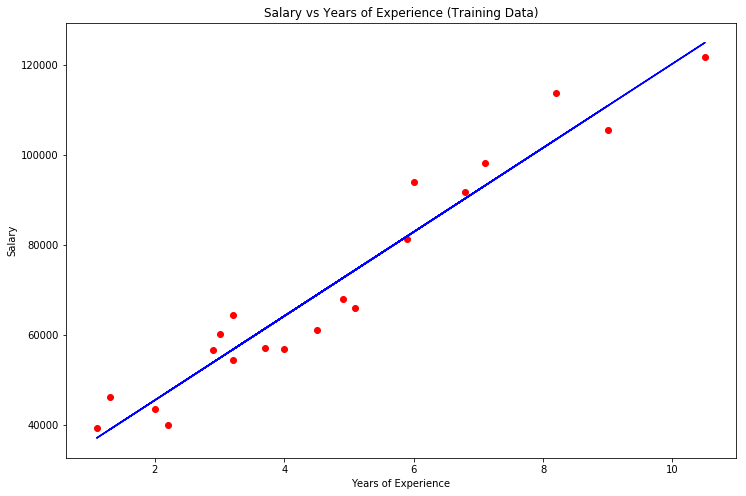

In [9]:
plt.figure(figsize = (12, 8))
plt.scatter(train_X, train_y, color = 'r')
plt.plot(train_X, linearRegression.predict(train_X), color = 'b')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience (Training Data)')

#### Testing Data Visualization

Text(0.5, 1.0, 'Salary vs Years of Experience (Testing Data)')

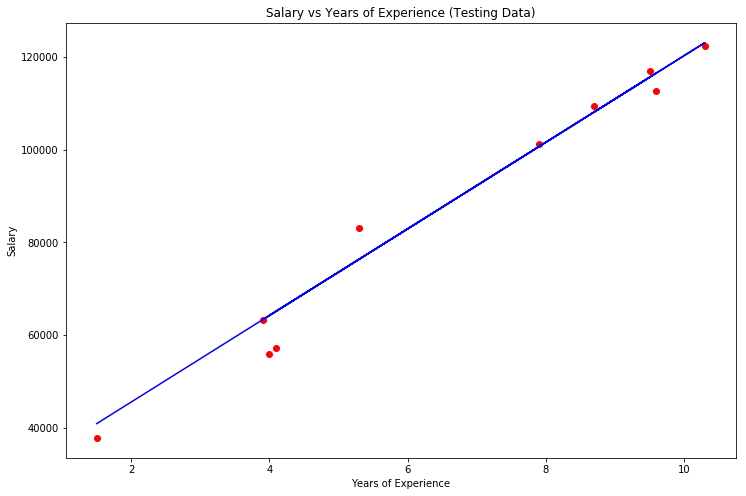

In [10]:
plt.figure(figsize = (12, 8))
plt.scatter(test_X, test_y, color = 'r')
plt.plot(test_X, linearRegression.predict(test_X), color = 'b')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience (Testing Data)')

### Multiple Linear Regression (More than 1 feature)

In [11]:
dataset = pd.read_csv('50_Startups.csv')
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [12]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0, test_size = 0.33)

In [13]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
train_X.iloc[:, :-1] = standardScaler.fit_transform(train_X.iloc[:, :-1])
test_X.iloc[:, :-1] = standardScaler.transform(test_X.iloc[:, :-1])

In [14]:
train_X = pd.get_dummies(train_X, columns = ['State'], drop_first = True)
test_X = pd.get_dummies(test_X, columns = ['State'], drop_first = True)

In [15]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression()
linearRegression.fit(train_X, train_y)
print("Training Score: {0:.2f}".format(linearRegression.score(train_X, train_y)*100))
print("Testing Score: {0:.2f}".format(linearRegression.score(test_X, test_y)*100))

Training Score: 95.76
Testing Score: 87.53


### Polynomial Regression

In [16]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [17]:
X = dataset.iloc[:, 1:2]
y = dataset.iloc[:, -1]

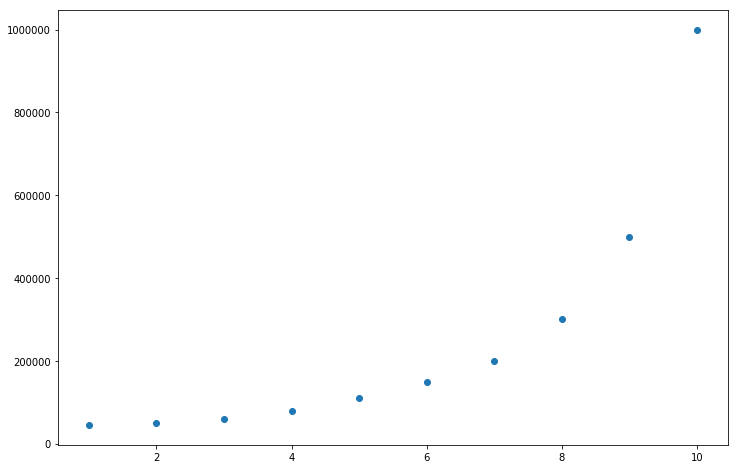

In [48]:
plt.figure(figsize = (12, 8))
plt.scatter(X, y)

In [49]:
from sklearn.preprocessing import PolynomialFeatures

polynomialFeatures = PolynomialFeatures(degree = 4)
X_poly = polynomialFeatures.fit_transform(X)
linearRegression = LinearRegression()
linearRegression.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0.5, 1.0, 'Expected Salary vs Years of Experience')

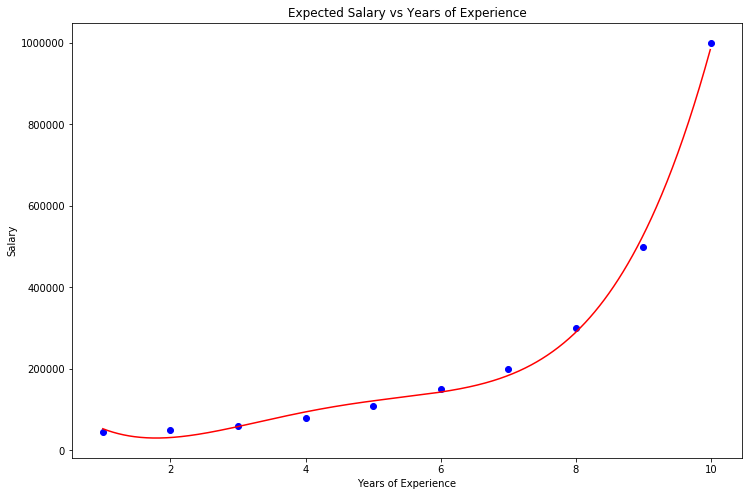

In [51]:
X_all = np.arange(min(X.values), max(X.values), 0.01).reshape(-1, 1)
X_all_poly = polynomialFeatures.fit_transform(X_all)
plt.figure(figsize = (12, 8))
plt.scatter(X, y, color = 'b')
plt.plot(X_all, 
         linearRegression.predict(X_all_poly), 
         color = 'r')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Expected Salary vs Years of Experience')

### Other Regressions

In [53]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [56]:
X = dataset.iloc[:, 1:2]
y = dataset.iloc[:, -1]

#### Decision Tree Regressor

In [67]:
from sklearn.tree import DecisionTreeRegressor

decisionTreeRegressor = DecisionTreeRegressor()
decisionTreeRegressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Text(0.5, 1.0, 'Expected Salary vs Years of Experience')

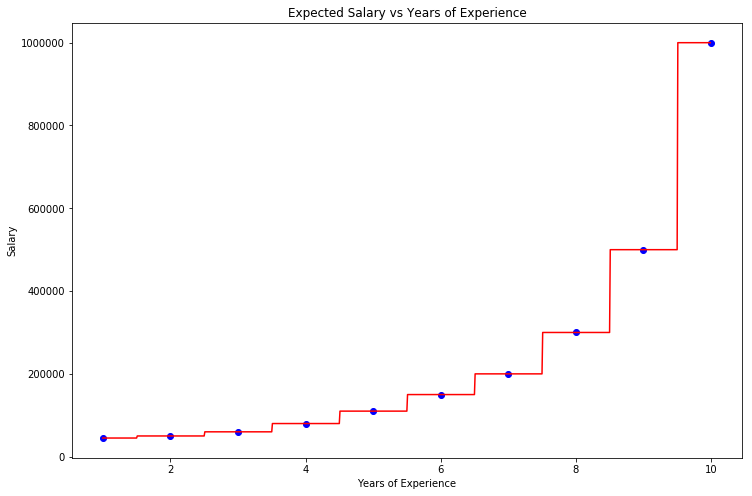

In [68]:
X_all = np.arange(min(X.values), max(X.values), 0.01).reshape(-1, 1)
# X_all_poly = polynomialFeatures.fit_transform(X_all)
plt.figure(figsize = (12, 8))
plt.scatter(X, y, color = 'b')
plt.plot(X_all, 
         decisionTreeRegressor.predict(X_all), 
         color = 'r')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Expected Salary vs Years of Experience')

#### Random Forest Regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor

randomForestRegressor = RandomForestRegressor()
randomForestRegressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Text(0.5, 1.0, 'Expected Salary vs Years of Experience')

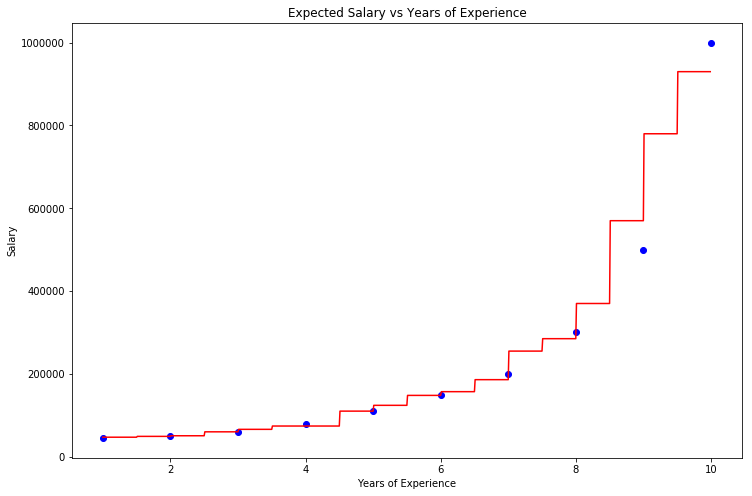

In [70]:
X_all = np.arange(min(X.values), max(X.values), 0.01).reshape(-1, 1)
plt.figure(figsize = (12, 8))
plt.scatter(X, y, color = 'b')
plt.plot(X_all, 
         randomForestRegressor.predict(X_all), 
         color = 'r')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Expected Salary vs Years of Experience')